 TMDB: Box Office Prediction
 **[Link to the challenge](https://www.kaggle.com/c/tmdb-box-office-prediction)**

 ## Description
 We're going to make you an offer you can't refuse: a Kaggle competition!

 In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

 In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

 Join in, "make our day", and then "you've got to ask yourself one question: 'Do I feel lucky?'"

 ## Exploratory Data Analysis

 Without further ado, let's first view the dataset, print out the predictors columns and try to get the first insight of the data.

 Before reading the csv with pandas, we save the file with encoding "utf-8".

In [3]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# Using seaborn to plot
import seaborn as sns
# Using os.path.join() to create system-independent paths
import os

# Defining where our data is located (for more than one folders, use a list)
DATA_FOLDER = ["..", "input", "tmdb-box-office-prediction"]
TRAIN_FILE = "train.csv"
TEST_FILE = "test.csv"

# Creating file paths
train_path = os.path.join(*DATA_FOLDER, TRAIN_FILE)
test_path = os.path.join(*DATA_FOLDER, TEST_FILE)

# Loading data with pandas (parsing date columns appropriately)
train_df = pd.read_csv(train_path, parse_dates=["release_date"], encoding="utf-8")
test_df = pd.read_csv(test_path, parse_dates=["release_date"], encoding="utf-8")

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


 #### Shape of the data
 Let's now print the number of observations and features of our datasets

In [4]:
print(train_df.shape)
print(test_df.shape)


(3000, 23)
(4398, 22)


 Now let's see the explanatory variables.

In [5]:
for col in train_df.columns:
    print(col)


id
belongs_to_collection
budget
genres
homepage
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
runtime
spoken_languages
status
tagline
title
Keywords
cast
crew
revenue


 So our dataset is composed of 3000 observations (id of the predictions will start from 3001, so we'll define it next) and 23 explanatory variables.

 ## Feature Engineering
 #### Dropping useless columns

 We gues that features like *popularity* are very descriptive of the variance in the response.

 On the contrary, *id*, *title*, *homepage*, *imdb_id*, *original_title*, *overview*, *poster_path* and *tagline* won't contribute to our prediction as they don't contribute to the revenue of the movie in any way. Therefore, they will be dropped.
 
 Furthermore, we will also drop those columns whose majority of values are NAs. Let's see the percentage, for each column, of NAs.

id                       0.000000
belongs_to_collection    0.798667
budget                   0.000000
genres                   0.002333
homepage                 0.684667
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.002667
popularity               0.000000
poster_path              0.000333
production_companies     0.052000
production_countries     0.018333
release_date             0.000000
runtime                  0.000667
spoken_languages         0.006667
status                   0.000000
tagline                  0.199000
title                    0.000000
Keywords                 0.092000
cast                     0.004333
crew                     0.005333
revenue                  0.000000
dtype: float64

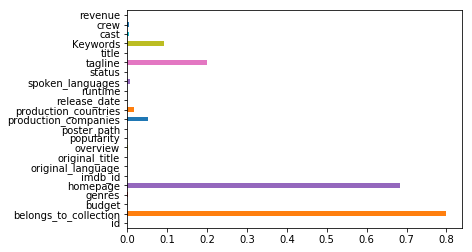

In [6]:
na_percentage = train_df.isna().mean()
display(na_percentage)
na_percentage.plot(kind="barh")

In [7]:
pred_id = 3001
cols_to_drop = ["belongs_to_collection", "id", "title", "homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline"]

train_df = train_df.drop(cols_to_drop, axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

# Displaying converted data
with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew
0,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,3.851534,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,3.217680,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


 #### Transforming columns whose elements are dict

 Some columns have dicts as values. Such dicts contains different informations, but we want to just retain the identifying one (in most, this is the *name*). For this reason, we are going to map these column values to the extracted name from the dicts.

 For such objective, we will use `pandas`'s method `map()`.

 Some features contain a single dict, others multiple dict: the former will be mapped to a string with the single name, the latter to the string representation of the list of names, and we will process them further in next steps.

 To avoid potential malfunctionings, we fill NA values of non numerical features with the class "None", and later, during a further step, we will appropiately choose the right class for such missing features.

In [8]:
import ast
# Using json.dumps() to have string with "" in our lists
import json

def parse_name(x):
    '''
    This function will parse the "name" property in the relative dict or list of dicts. 
    Returns either a string containing the name or a string representation of a list of all names.
    '''

    if x != "None":
        ls = ast.literal_eval(x)
    else:
        return "None"
    
    if len(ls) == 1:
        return ls[0]["name"]
    else:
        return json.dumps([d["name"] for d in ls])

def parse_iso(x):
    '''
    This function will parse the "iso_*" property in the relative dict or list of dicts. 
    Returns either a string containing the name or a string representation of a list of all iso_*.
    '''

    if x != "None":
        ls = ast.literal_eval(x)
    else:
        return "None"

    if len(ls) == 1:
        return list(ls[0].values())[0]
    else:
        return str([list(d.values())[0] for d in ls])

# Selecting categorical and numerical columns
cat_cols = train_df.select_dtypes(exclude=["number", "datetime"]).columns
num_cols = train_df.select_dtypes("number").columns

# Saving categorical and numerical columns
train_df[cat_cols] = train_df[cat_cols].fillna("None")
test_df[cat_cols] = test_df[cat_cols].fillna("None")

for cat in ["genres", "production_companies", "Keywords", "cast", "crew"]:
    train_df[cat] = train_df[cat].map(parse_name)
    test_df[cat] = test_df[cat].map(parse_name)

for cat in ["production_countries", "spoken_languages"]:
    train_df[cat] = train_df[cat].map(parse_iso)
    test_df[cat] = test_df[cat].map(parse_iso)

# Displaying converted data
with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue
0,14000000,Comedy,en,6.575393,"[""Paramount Pictures"", ""United Artists"", ""Metr...",US,2015-02-20,93.0,en,Released,"[""time travel"", ""sequel"", ""hot tub"", ""duringcr...","[""Rob Corddry"", ""Craig Robinson"", ""Clark Duke""...","[""Kelly Cantley"", ""Steve Pink"", ""Josh Heald"", ...",12314651
1,40000000,"[""Comedy"", ""Drama"", ""Family"", ""Romance""]",en,8.248895,Walt Disney Pictures,US,2004-08-06,113.0,en,Released,"[""coronation"", ""duty"", ""marriage"", ""falling in...","[""Anne Hathaway"", ""Julie Andrews"", ""H\u221a\u0...","[""Garry Marshall"", ""Charles Minsky"", ""John Deb...",95149435
2,3300000,Drama,en,64.299990,"[""Bold Films"", ""Blumhouse Productions"", ""Right...",US,2014-10-10,105.0,en,Released,"[""jazz"", ""obsession"", ""conservatory"", ""music t...","[""Miles Teller"", ""J.K. Simmons"", ""Melissa Beno...","[""Terri Taylor"", ""Richard Henderson"", ""Jeffrey...",13092000
3,1200000,"[""Thriller"", ""Drama""]",hi,3.174936,None,IN,2012-03-09,122.0,"['en', 'hi']",Released,"[""mystery"", ""bollywood"", ""police corruption"", ...","[""Vidya Balan"", ""Nawazuddin Siddiqui"", ""Paramb...","[""Sujoy Ghosh"", ""Sujoy Ghosh"", ""Sujoy Ghosh""]",16000000
4,0,"[""Action"", ""Thriller""]",ko,1.148070,None,KR,2009-02-05,118.0,ko,Released,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Park Si-yeon...","[""Jong-seok Yoon"", ""Jong-seok Yoon""]",3923970


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew
0,0,"[""Adventure"", ""Animation"", ""Family"", ""Fantasy""]",ja,3.851534,None,"['JP', 'US']",2007-07-14,90.0,"['en', 'ja']",Released,"[""pok\u221a\u00a9mon"", ""pocket monsters""]","[""Craig Blair"", ""Emily Bauer"", ""Sarah Natochen...","[""Kunihiko Yuyama"", ""Hideki Sonoda""]"
1,88000,"[""Horror"", ""Science Fiction""]",en,3.559789,Woolner Brothers Pictures Inc.,US,2058-05-19,65.0,en,Released,"[""revenge"", ""alien"", ""b movie"", ""cheating husb...","[""Allison Hayes"", ""William Hudson"", ""Yvette Vi...","[""Edward Mann"", ""Jacques R. Marquette"", ""Jacqu..."
2,0,"[""Comedy"", ""Romance""]",en,8.085194,"[""Warner Bros."", ""Outlaw Productions (I)"", ""Mi...",US,1997-05-23,100.0,en,Released,"[""jealousy"", ""love"", ""revenge"", ""break-up""]","[""Meg Ryan"", ""Matthew Broderick"", ""Kelly Prest...","[""Griffin Dunne"", ""Robert F. Newmyer"", ""Jeffre..."
3,6800000,"[""Drama"", ""War"", ""Mystery""]",fr,8.596012,"[""TS Productions"", ""Micro scope"", ""Phi Group""]","['CA', 'FR']",2010-09-04,130.0,"['fr', 'ar', 'en']",Released,"[""prison"", ""middle east"", ""rape"", ""muslim"", ""m...","[""Lubna Azabal"", ""M\u221a\u00a9lissa D\u221a\u...","[""Louis Craig"", ""Lucie Robitaille"", ""Gilles Sa..."
4,2000000,"[""History"", ""Documentary""]",en,3.217680,None,US,2005-02-11,92.0,en,Released,"[""usa"", ""1970s"", ""sexual revolution"", ""unsimul...","[""Dennis Hopper"", ""Peter Bart"", ""Warren Beatty...","[""Brian Grazer"", ""Kim Roth"", ""Ron Howard"", ""Fe..."


 #### Reducing multiple occurrences in the lists and turn lists with just one element to strings.

In [9]:
def unique_vals(x):
    if not x.startswith("[\""):
        return x 
    else:
        ls = ast.literal_eval(x)
        uniq = list(set(ls))
        if (len(uniq) == 1):
            return uniq[0]
        else:
            return json.dumps(uniq)

for cat in cat_cols:
    train_df[cat] = train_df[cat].map(unique_vals)
    test_df[cat] = test_df[cat].map(unique_vals)

# Displaying converted data
with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue
0,14000000,Comedy,en,6.575393,"[""United Artists"", ""Paramount Pictures"", ""Metr...",US,2015-02-20,93.0,en,Released,"[""hot tub"", ""sequel"", ""duringcreditsstinger"", ...","[""John Cusack"", ""Adam Herschman"", ""Adam Scott""...","[""Tarik Naim Alherimi"", ""Victoria Rose Sampson...",12314651
1,40000000,"[""Romance"", ""Family"", ""Comedy"", ""Drama""]",en,8.248895,Walt Disney Pictures,US,2004-08-06,113.0,en,Released,"[""marriage"", ""falling in love"", ""duty"", ""coron...","[""Rowan Joseph"", ""Abigail Breslin"", ""Jeffrey S...","[""Garry Marshall"", ""Debra Martin Chase"", ""Mari...",95149435
2,3300000,Drama,en,64.299990,"[""Blumhouse Productions"", ""Bold Films"", ""Right...",US,2014-10-10,105.0,en,Released,"[""drummer"", ""jazz"", ""new york city"", ""young ad...","[""Austin Stowell"", ""Adrian Burks"", ""Miles Tell...","[""Vahe Giragol"", ""Michel Litvak"", ""Mike Will"",...",13092000
3,1200000,"[""Thriller"", ""Drama""]",hi,3.174936,None,IN,2012-03-09,122.0,"['en', 'hi']",Released,"[""police corruption"", ""crime"", ""bollywood"", ""m...","[""Saswata Chatterjee"", ""Nawazuddin Siddiqui"", ...",Sujoy Ghosh,16000000
4,0,"[""Thriller"", ""Action""]",ko,1.148070,None,KR,2009-02-05,118.0,ko,Released,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Kim Joon-bae...",Jong-seok Yoon,3923970


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew
0,0,"[""Fantasy"", ""Adventure"", ""Family"", ""Animation""]",ja,3.851534,None,"['JP', 'US']",2007-07-14,90.0,"['en', 'ja']",Released,"[""pocket monsters"", ""pok\u221a\u00a9mon""]","[""Ikue \u2248\u00e5tani"", ""Bill Timoney"", ""Sar...","[""Kunihiko Yuyama"", ""Hideki Sonoda""]"
1,88000,"[""Science Fiction"", ""Horror""]",en,3.559789,Woolner Brothers Pictures Inc.,US,2058-05-19,65.0,en,Released,"[""cheating husband"", ""alien"", ""woman"", ""chrysl...","[""Allison Hayes"", ""Roy Gordon"", ""George Dougla...","[""Edward Mann"", ""Bernard Woolner"", ""Mark Hanna..."
2,0,"[""Romance"", ""Comedy""]",en,8.085194,"[""Miramax"", ""Outlaw Productions (I)"", ""Warner ...",US,1997-05-23,100.0,en,Released,"[""jealousy"", ""revenge"", ""break-up"", ""love""]","[""Matthew Broderick"", ""Maureen Stapleton"", ""Tc...","[""Rachel Portman"", ""Robert Gordon"", ""Andrew Du..."
3,6800000,"[""War"", ""Mystery"", ""Drama""]",fr,8.596012,"[""Phi Group"", ""Micro scope"", ""TS Productions""]","['CA', 'FR']",2010-09-04,130.0,"['fr', 'ar', 'en']",Released,"[""swimming pool"", ""political assassination"", ""...","[""Mohamed Majd"", ""Fr\u221a\u00a9d\u221a\u00a9r...","[""Steve Lucescu"", ""Benoit Touchette"", ""Vincent..."
4,2000000,"[""History"", ""Documentary""]",en,3.217680,None,US,2005-02-11,92.0,en,Released,"[""unsimulated sex"", ""usa"", ""1970s"", ""sexual re...","[""Carl Bernstein"", ""Dennis Hopper"", ""Peter Bar...","[""Randy Barbato"", ""Ron Howard"", ""William Grayb..."


 #### Statistics about the data
 We can see that we have categories that span into lots of classes. What should we do about them?

 First, we need to stack the dataframes (by dropping in the first one the response variable) in order to cumulatively see the class distributions.

 Then, for each actor, we count the number of movies he starred in. And we describe a pandas series so that we can get all the statistical informations we need to classify an actor as popular or unpopular.

 The crew feature will become "n of popular actors", where we specify the number of popular actors starring in that movie, where popular means that an actor has taken part in a number of movies more than a threshold.

 We choose a popularity threshold equal to the mean plus three times the standard deviation of the dataset, and we ceil it to the nearest greater integer. We will pass these as arguments to our function `get_thres()`, which we will define first.

In [10]:
def get_thres(series, n_std=3):
    '''
    Return threshold according to the formula:
    thres = series.mean() + n_std * series.std()
    ceiled to the nearest integer. Default n_std
    is 3.
    '''
    return np.ceil(series.mean() + n_std * series.std())
    
# Concatenating the two dataframes
merged_df = pd.concat([train_df.drop("revenue", axis=1), test_df], ignore_index=True, sort=False)

actor_dict = {}
n_movies = merged_df.shape[0]

for val in merged_df["cast"]:
    if val.startswith("[\""):
        val_ls = [n for n in ast.literal_eval(val)]
    else:
        val_ls = [val]

    for e in val_ls:
        if e in actor_dict.keys():
            actor_dict[e] += 1
        else:
            actor_dict[e] = 1

# Series of frequencies of appearances of actors
actor_freq = pd.Series(actor_dict)

# Statistics about the above created series
actor_freq.describe()

# Setting the popularity threshold
pop_threshold = get_thres(actor_freq)

# List of actors whose popularity meets the threshold
pop_actors = actor_freq[actor_freq >= pop_threshold].index.tolist()


 We can see that there are only a few actors whose popularity is above our threshold.

 For each movie, we are going to count these popular actors, so that we can turn the category *crew* into a more useful feature, called *n_popular_actors*.

In [11]:
n_popular_actors_train = []
n_popular_actors_test = []

for act in train_df["cast"]:
    n = 0
    if act.startswith("[\""):
        for e in ast.literal_eval(act):
            if e in pop_actors:
                n += 1
    else:
        if act in pop_actors:
            n += 1

    n_popular_actors_train.append(n)

for act in test_df["cast"]:
    n = 0
    if act.startswith("[\""):
        for e in ast.literal_eval(act):
            if e in pop_actors:
                n += 1
    else:
        if act in pop_actors:
            n += 1

    n_popular_actors_test.append(n)

# Creating new column
train_df = train_df.assign(n_popular_actors=pd.Series(n_popular_actors_train))  
test_df = test_df.assign(n_popular_actors=pd.Series(n_popular_actors_test))  

# Dropping crew column
train_df = train_df.drop("crew", axis=1)
test_df = test_df.drop("crew", axis=1)


 Let's see how the new column is related to the response, to see if we made a good choice.

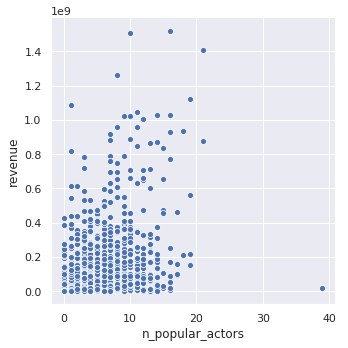

In [12]:
sns.set()

# plt.figure(figsize=(15,10), dpi=80)
sns.relplot(x="n_popular_actors", y="revenue", data=train_df)

plt.show()

 We can see that, except an observation, the number of popular actors is positively correlated to the revenue of a movie. This means that only a movie that had lots of actors didn't succeed. This is an **outlier** in our data, but we won't remove it since we are using RandomForest and XGBoost, which are very solid models.

 The other similiar columns, such as *Keywords*, *belongs_to_collection*, *production_companies* and so on, can be quantified using this popularity measure, since our objective here is not to make inferences but to predict the revenue. 

 The *status* can be encoded in a binary way. We are then encoding it using 1s and 0s, and we set the column dtype as number.

In [13]:
# Encoding binary column status
train_df["status"] = train_df["status"].map(lambda x: 1 if x == "Released" else 0).astype("int")
test_df["status"] = test_df["status"].map(lambda x: 1 if x == "Released" else 0).astype("int")

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,revenue,n_popular_actors
0,14000000,Comedy,en,6.575393,"[""United Artists"", ""Paramount Pictures"", ""Metr...",US,2015-02-20,93.0,en,1,"[""hot tub"", ""sequel"", ""duringcreditsstinger"", ...","[""John Cusack"", ""Adam Herschman"", ""Adam Scott""...",12314651,6
1,40000000,"[""Romance"", ""Family"", ""Comedy"", ""Drama""]",en,8.248895,Walt Disney Pictures,US,2004-08-06,113.0,en,1,"[""marriage"", ""falling in love"", ""duty"", ""coron...","[""Rowan Joseph"", ""Abigail Breslin"", ""Jeffrey S...",95149435,8
2,3300000,Drama,en,64.299990,"[""Blumhouse Productions"", ""Bold Films"", ""Right...",US,2014-10-10,105.0,en,1,"[""drummer"", ""jazz"", ""new york city"", ""young ad...","[""Austin Stowell"", ""Adrian Burks"", ""Miles Tell...",13092000,3
3,1200000,"[""Thriller"", ""Drama""]",hi,3.174936,None,IN,2012-03-09,122.0,"['en', 'hi']",1,"[""police corruption"", ""crime"", ""bollywood"", ""m...","[""Saswata Chatterjee"", ""Nawazuddin Siddiqui"", ...",16000000,0
4,0,"[""Thriller"", ""Action""]",ko,1.148070,None,KR,2009-02-05,118.0,ko,1,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Kim Joon-bae...",3923970,0


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,n_popular_actors
0,0,"[""Fantasy"", ""Adventure"", ""Family"", ""Animation""]",ja,3.851534,None,"['JP', 'US']",2007-07-14,90.0,"['en', 'ja']",1,"[""pocket monsters"", ""pok\u221a\u00a9mon""]","[""Ikue \u2248\u00e5tani"", ""Bill Timoney"", ""Sar...",0
1,88000,"[""Science Fiction"", ""Horror""]",en,3.559789,Woolner Brothers Pictures Inc.,US,2058-05-19,65.0,en,1,"[""cheating husband"", ""alien"", ""woman"", ""chrysl...","[""Allison Hayes"", ""Roy Gordon"", ""George Dougla...",0
2,0,"[""Romance"", ""Comedy""]",en,8.085194,"[""Miramax"", ""Outlaw Productions (I)"", ""Warner ...",US,1997-05-23,100.0,en,1,"[""jealousy"", ""revenge"", ""break-up"", ""love""]","[""Matthew Broderick"", ""Maureen Stapleton"", ""Tc...",4
3,6800000,"[""War"", ""Mystery"", ""Drama""]",fr,8.596012,"[""Phi Group"", ""Micro scope"", ""TS Productions""]","['CA', 'FR']",2010-09-04,130.0,"['fr', 'ar', 'en']",1,"[""swimming pool"", ""political assassination"", ""...","[""Mohamed Majd"", ""Fr\u221a\u00a9d\u221a\u00a9r...",0
4,2000000,"[""History"", ""Documentary""]",en,3.217680,None,US,2005-02-11,92.0,en,1,"[""unsimulated sex"", ""usa"", ""1970s"", ""sexual re...","[""Carl Bernstein"", ""Dennis Hopper"", ""Peter Bar...",1


#### English as reference
We all know that, in general, movies whose language is English and/or produced in English speaking countries are more widespread than those who are produced elsewhere. We can therefore turn this kind of variables in idicator variables that specify whether the movie has been produced in an English speaking country or not, or whether English is a spoken language or not.

By doing this, we can drop *original_language*, *production_countries* and *spoken_languages*.

We are going to turn the latter two into *produced_in_us* and *english_original_lang* and *english spoken*. Their meaning is obvious.

In [14]:
# Creating columns
train_df["produced_in_us"] = train_df["production_countries"].map(lambda x: 1 if "US" in x else 0)
test_df["produced_in_us"] = test_df["production_countries"].map(lambda x: 1 if "US" in x else 0)
train_df["english_original"] = train_df["original_language"].map(lambda x: 1 if "en" in x else 0)
test_df["english_original"] = test_df["original_language"].map(lambda x: 1 if "en" in x else 0)
train_df["english_spoken"] = train_df["spoken_languages"].map(lambda x: 1 if "en" in x else 0)
test_df["english_spoken"] = test_df["spoken_languages"].map(lambda x: 1 if "en" in x else 0)

# Dropping old columns
train_df = train_df.drop(["production_countries", "spoken_languages", "original_language"], axis=1)
test_df = test_df.drop(["production_countries", "spoken_languages", "original_language"], axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genres,popularity,production_companies,release_date,runtime,status,Keywords,cast,revenue,n_popular_actors,produced_in_us,english_original,english_spoken
0,14000000,Comedy,6.575393,"[""United Artists"", ""Paramount Pictures"", ""Metr...",2015-02-20,93.0,1,"[""hot tub"", ""sequel"", ""duringcreditsstinger"", ...","[""John Cusack"", ""Adam Herschman"", ""Adam Scott""...",12314651,6,1,1,1
1,40000000,"[""Romance"", ""Family"", ""Comedy"", ""Drama""]",8.248895,Walt Disney Pictures,2004-08-06,113.0,1,"[""marriage"", ""falling in love"", ""duty"", ""coron...","[""Rowan Joseph"", ""Abigail Breslin"", ""Jeffrey S...",95149435,8,1,1,1
2,3300000,Drama,64.299990,"[""Blumhouse Productions"", ""Bold Films"", ""Right...",2014-10-10,105.0,1,"[""drummer"", ""jazz"", ""new york city"", ""young ad...","[""Austin Stowell"", ""Adrian Burks"", ""Miles Tell...",13092000,3,1,1,1
3,1200000,"[""Thriller"", ""Drama""]",3.174936,None,2012-03-09,122.0,1,"[""police corruption"", ""crime"", ""bollywood"", ""m...","[""Saswata Chatterjee"", ""Nawazuddin Siddiqui"", ...",16000000,0,0,0,1
4,0,"[""Thriller"", ""Action""]",1.148070,None,2009-02-05,118.0,1,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Kim Joon-bae...",3923970,0,0,0,0


,budget,genres,popularity,production_companies,release_date,runtime,status,Keywords,cast,n_popular_actors,produced_in_us,english_original,english_spoken
0,0,"[""Fantasy"", ""Adventure"", ""Family"", ""Animation""]",3.851534,None,2007-07-14,90.0,1,"[""pocket monsters"", ""pok\u221a\u00a9mon""]","[""Ikue \u2248\u00e5tani"", ""Bill Timoney"", ""Sar...",0,1,0,1
1,88000,"[""Science Fiction"", ""Horror""]",3.559789,Woolner Brothers Pictures Inc.,2058-05-19,65.0,1,"[""cheating husband"", ""alien"", ""woman"", ""chrysl...","[""Allison Hayes"", ""Roy Gordon"", ""George Dougla...",0,1,1,1
2,0,"[""Romance"", ""Comedy""]",8.085194,"[""Miramax"", ""Outlaw Productions (I)"", ""Warner ...",1997-05-23,100.0,1,"[""jealousy"", ""revenge"", ""break-up"", ""love""]","[""Matthew Broderick"", ""Maureen Stapleton"", ""Tc...",4,1,1,1
3,6800000,"[""War"", ""Mystery"", ""Drama""]",8.596012,"[""Phi Group"", ""Micro scope"", ""TS Productions""]",2010-09-04,130.0,1,"[""swimming pool"", ""political assassination"", ""...","[""Mohamed Majd"", ""Fr\u221a\u00a9d\u221a\u00a9r...",0,0,0,1
4,2000000,"[""History"", ""Documentary""]",3.217680,None,2005-02-11,92.0,1,"[""unsimulated sex"", ""usa"", ""1970s"", ""sexual re...","[""Carl Bernstein"", ""Dennis Hopper"", ""Peter Bar...",1,1,1,1


Let's see for the three new variables if there's correlation with the response.

In [15]:
mean_revenue_us = train_df[train_df["produced_in_us"] == 1]["revenue"].mean()
mean_revenue_non_us = train_df[train_df["produced_in_us"] == 0]["revenue"].mean()
print("Mean revenue US movies: " + str(np.round(mean_revenue_us, 2)))
print("Mean revenue non US movies: " + str(np.round(mean_revenue_non_us, 2)))

mean_revenue_eng_original = train_df[train_df["english_original"] == 1]["revenue"].mean()
mean_revenue_eng_non_original = train_df[train_df["english_original"] == 0]["revenue"].mean()
print("Mean revenue English original: " + str(np.round(mean_revenue_eng_original, 2)))
print("Mean revenue non English original: " + str(np.round(mean_revenue_eng_non_original, 2)))

mean_revenue_eng_spoken = train_df[train_df["english_spoken"] == 1]["revenue"].mean()
mean_revenue_eng_non_spoken = train_df[train_df["english_spoken"] == 0]["revenue"].mean()
print("Mean revenue English spoken: " + str(np.round(mean_revenue_eng_spoken, 2)))
print("Mean revenue non English spoken: " + str(np.round(mean_revenue_eng_non_spoken, 2)))

Mean revenue US movies: 81966795.53
Mean revenue non US movies: 18285972.51
Mean revenue English original: 74665908.71
Mean revenue non English original: 18618448.79
Mean revenue English spoken: 73838594.94
Mean revenue non English spoken: 17979356.34


We can see that a film produced in the US, or whose language is English, in general gets more revenue than the rest of movies. Clearly, being produced in the US and being in English is positively correlated with an high revenue.

Now, we can deal with the columns *production_companies*, *Keywords* and *cast* by defining the most popular ones from the merged dataset and use the count of these as predictor. For such purpose, we will use the already defined function `get_thres()`.

In [16]:
pc_dict = {}
kw_dict = {}
cast_dict = {}

for pc in merged_df["production_companies"]:
    if pc.startswith("[\"") or pc.startswith("[\'"):
        ls = ast.literal_eval(pc)
        for val in ls:
            if val not in pc_dict.keys():
                pc_dict[val] = 1
            else:
                pc_dict[val] += 1
    else:
        if pc not in pc_dict.keys():
            pc_dict[pc] = 1
        else:
            pc_dict[pc] += 1
            
for kw in merged_df["Keywords"]:
    if kw.startswith("[\"") or kw.startswith("[\'"):
        ls = ast.literal_eval(kw)
        for val in ls:
            if val not in kw_dict.keys():
                kw_dict[val] = 1
            else:
                kw_dict[val] += 1
    else:
        if kw not in kw_dict.keys():
            kw_dict[kw] = 1
        else:
            kw_dict[kw] += 1
            
for cast in merged_df["cast"]:
    if cast.startswith("[\"") or cast.startswith("[\'"):
        ls = ast.literal_eval(cast)
        for val in ls:
            if val not in cast_dict.keys():
                cast_dict[val] = 1
            else:
                cast_dict[val] += 1
    else:
        if cast not in cast_dict.keys():
            cast_dict[kw] = 1
        else:
            cast_dict[kw] += 1
            
# Turning dicts into series
pc_series = pd.Series(pc_dict)
kw_series = pd.Series(kw_dict)
cast_series = pd.Series(cast_dict)

# Thresholds
pc_thres = get_thres(pc_series)
kw_thres = get_thres(kw_series)
cast_thres = get_thres(cast_series)

# Making the lists
popular_pc = pc_series[pc_series >= pc_thres].index.tolist()
popular_kw = kw_series[kw_series >= kw_thres].index.tolist()
popular_cast = cast_series[cast_series >= cast_thres].index.tolist()

# List of those that will be the columns of our dataframe
n_pop_pc_train = []
n_pop_kw_train = []
n_pop_cast_train = []
n_pop_pc_test = []
n_pop_kw_test = []
n_pop_cast_test = []

for _, row in train_df.iterrows():
    n_pc = 0
    n_kw = 0
    n_cast = 0
    
    if row["production_companies"].startswith("[\"") or row["production_companies"].startswith("[\'"):
        ls = ast.literal_eval(row["production_companies"])
        for val in ls:
            if val in popular_pc:
                n_pc += 1
    else:
        if row["production_companies"] in popular_pc and row["production_companies"] != "None":
            n_pc += 1
            
    if row["Keywords"].startswith("[\"") or row["Keywords"].startswith("[\'"):
        ls = ast.literal_eval(row["Keywords"])
        for val in ls:
            if val in popular_kw:
                n_kw += 1
    else:
        if row["Keywords"] in popular_kw and row["Keywords"] != "None":
            n_kw += 1   
    
    if row["cast"].startswith("[\"") or row["cast"].startswith("[\'"):
        ls = ast.literal_eval(row["cast"])
        for val in ls:
            if val in popular_cast:
                n_cast += 1
    else:
        if row["cast"] in popular_cast and row["cast"] != "None":
            n_cast += 1   
            
    n_pop_pc_train.append(n_pc)
    n_pop_kw_train.append(n_kw)
    n_pop_cast_train.append(n_cast)
    
for _, row in test_df.iterrows():
    n_pc = 0
    n_kw = 0
    n_cast = 0
    
    if row["production_companies"].startswith("[\"") or row["production_companies"].startswith("[\'"):
        ls = ast.literal_eval(row["production_companies"])
        for val in ls:
            if val in popular_pc:
                n_pc += 1
    else:
        if row["production_companies"] in popular_pc and row["production_companies"] != "None":
            n_pc += 1
            
    if row["Keywords"].startswith("[\"") or row["Keywords"].startswith("[\'"):
        ls = ast.literal_eval(row["Keywords"])
        for val in ls:
            if val in popular_kw:
                n_kw += 1
    else:
        if row["Keywords"] in popular_kw and row["Keywords"] != "None":
            n_kw += 1   
    
    if row["cast"].startswith("[\"") or row["cast"].startswith("[\'"):
        ls = ast.literal_eval(row["cast"])
        for val in ls:
            if val in popular_cast:
                n_cast += 1
    else:
        if row["cast"] in popular_cast and row["cast"] != "None":
            n_cast += 1   
            
    n_pop_pc_test.append(n_pc)
    n_pop_kw_test.append(n_kw)
    n_pop_cast_test.append(n_cast)
    
# Creating the new columns on the dataframes
train_df["n_popular_pc"] = pd.Series(n_pop_pc_train)
train_df["n_popular_kw"] = pd.Series(n_pop_kw_train)
train_df["n_popular_cast"] = pd.Series(n_pop_cast_train)

test_df["n_popular_pc"] = pd.Series(n_pop_pc_test)
test_df["n_popular_kw"] = pd.Series(n_pop_kw_test)
test_df["n_popular_cast"] = pd.Series(n_pop_cast_test)

# Dropping old columns
train_df = train_df.drop(["production_companies", "Keywords", "cast"], axis=1)
test_df = test_df.drop(["production_companies", "Keywords", "cast"], axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genres,popularity,release_date,runtime,status,revenue,n_popular_actors,produced_in_us,english_original,english_spoken,n_popular_pc,n_popular_kw,n_popular_cast
0,14000000,Comedy,6.575393,2015-02-20,93.0,1,12314651,6,1,1,1,3,3,6
1,40000000,"[""Romance"", ""Family"", ""Comedy"", ""Drama""]",8.248895,2004-08-06,113.0,1,95149435,8,1,1,1,1,1,8
2,3300000,Drama,64.299990,2014-10-10,105.0,1,13092000,3,1,1,1,0,3,3
3,1200000,"[""Thriller"", ""Drama""]",3.174936,2012-03-09,122.0,1,16000000,0,0,0,1,0,0,0
4,0,"[""Thriller"", ""Action""]",1.148070,2009-02-05,118.0,1,3923970,0,0,0,0,0,0,0


,budget,genres,popularity,release_date,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken,n_popular_pc,n_popular_kw,n_popular_cast
0,0,"[""Fantasy"", ""Adventure"", ""Family"", ""Animation""]",3.851534,2007-07-14,90.0,1,0,1,0,1,0,0,0
1,88000,"[""Science Fiction"", ""Horror""]",3.559789,2058-05-19,65.0,1,0,1,1,1,0,3,0
2,0,"[""Romance"", ""Comedy""]",8.085194,1997-05-23,100.0,1,4,1,1,1,1,3,4
3,6800000,"[""War"", ""Mystery"", ""Drama""]",8.596012,2010-09-04,130.0,1,0,0,0,1,0,2,0
4,2000000,"[""History"", ""Documentary""]",3.217680,2005-02-11,92.0,1,1,1,1,1,0,1,1


Let's plot their relationship with the revenue.

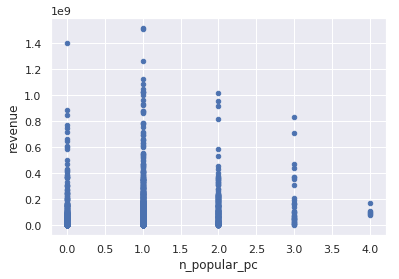

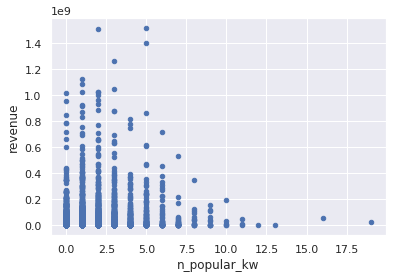

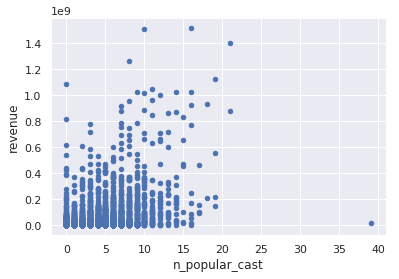

In [17]:
train_df.plot(x="n_popular_pc", y="revenue", kind="scatter")
train_df.plot(x="n_popular_kw", y="revenue", kind="scatter")
train_df.plot(x="n_popular_cast", y="revenue", kind="scatter")

Let's remove *n_popular_pc* and *n_popular_kw* as they're not correlated with the response in any way. Let's calculate the correlation between *n_popular_cast* and *n_popular_actors*, and we'll drop the former if we see a high correlation.

In [18]:
train_df = train_df.drop(["n_popular_pc", "n_popular_kw"], axis=1)
test_df = test_df.drop(["n_popular_pc", "n_popular_kw"], axis=1)

print(train_df.corr()["n_popular_cast"]["n_popular_actors"])

0.9996627297750201


Here we go, a very high correlation. Let's remove *n_popular_cast* from our dataframes.

In [19]:
train_df = train_df.drop(["n_popular_cast"], axis=1)
test_df = test_df.drop(["n_popular_cast"], axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genres,popularity,release_date,runtime,status,revenue,n_popular_actors,produced_in_us,english_original,english_spoken
0,14000000,Comedy,6.575393,2015-02-20,93.0,1,12314651,6,1,1,1
1,40000000,"[""Romance"", ""Family"", ""Comedy"", ""Drama""]",8.248895,2004-08-06,113.0,1,95149435,8,1,1,1
2,3300000,Drama,64.299990,2014-10-10,105.0,1,13092000,3,1,1,1
3,1200000,"[""Thriller"", ""Drama""]",3.174936,2012-03-09,122.0,1,16000000,0,0,0,1
4,0,"[""Thriller"", ""Action""]",1.148070,2009-02-05,118.0,1,3923970,0,0,0,0


,budget,genres,popularity,release_date,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken
0,0,"[""Fantasy"", ""Adventure"", ""Family"", ""Animation""]",3.851534,2007-07-14,90.0,1,0,1,0,1
1,88000,"[""Science Fiction"", ""Horror""]",3.559789,2058-05-19,65.0,1,0,1,1,1
2,0,"[""Romance"", ""Comedy""]",8.085194,1997-05-23,100.0,1,4,1,1,1
3,6800000,"[""War"", ""Mystery"", ""Drama""]",8.596012,2010-09-04,130.0,1,0,0,0,1
4,2000000,"[""History"", ""Documentary""]",3.217680,2005-02-11,92.0,1,1,1,1,1


#### Dealing with datetime feature
We have a datetime feature that is *release_date*. Before converting it in a more suitable format for our model, let's plot it against the *revenue* variable to spot if there are particular trends.

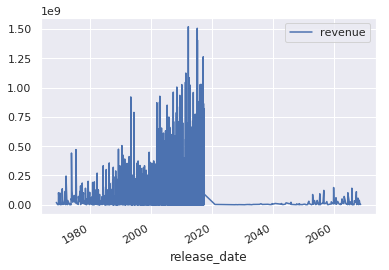

In [20]:
train_df.plot(x="release_date", y="revenue")

From the plot, we can see that recent movies tend to have a higher revenue. However, we see that there are movies whose release date is after the date the dataset was released (Feb. 6th, 2019). Let's remove these.

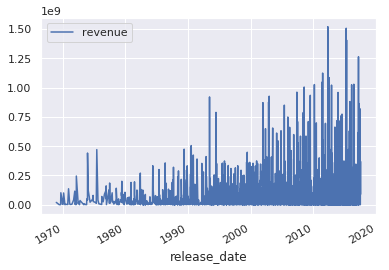

In [21]:
ds_release = pd.to_datetime("06-02-2019")

train_df = train_df.drop(train_df[train_df["release_date"] >= ds_release].index)

train_df.plot(x="release_date", y="revenue")

The first feature length multi-reel film in the world was the 1906 Australian production called The Story of the Kelly Gang. Let's use this year as the base to which we can encode our movie dates.

In [22]:
base_year = 1906

train_df["n_years_from_first_movie"] = train_df["release_date"].map(lambda x: x.year - base_year)
test_df["n_years_from_first_movie"] = test_df["release_date"].map(lambda x: x.year - base_year)

train_df = train_df.drop(["release_date"], axis=1)
test_df = test_df.drop(["release_date"], axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genres,popularity,runtime,status,revenue,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie
0,14000000,Comedy,6.575393,93.0,1,12314651,6,1,1,1,109
1,40000000,"[""Romance"", ""Family"", ""Comedy"", ""Drama""]",8.248895,113.0,1,95149435,8,1,1,1,98
2,3300000,Drama,64.299990,105.0,1,13092000,3,1,1,1,108
3,1200000,"[""Thriller"", ""Drama""]",3.174936,122.0,1,16000000,0,0,0,1,106
4,0,"[""Thriller"", ""Action""]",1.148070,118.0,1,3923970,0,0,0,0,103


,budget,genres,popularity,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie
0,0,"[""Fantasy"", ""Adventure"", ""Family"", ""Animation""]",3.851534,90.0,1,0,1,0,1,101.0
1,88000,"[""Science Fiction"", ""Horror""]",3.559789,65.0,1,0,1,1,1,152.0
2,0,"[""Romance"", ""Comedy""]",8.085194,100.0,1,4,1,1,1,91.0
3,6800000,"[""War"", ""Mystery"", ""Drama""]",8.596012,130.0,1,0,0,0,1,104.0
4,2000000,"[""History"", ""Documentary""]",3.217680,92.0,1,1,1,1,1,99.0


Let's keep only the first genre in multi-genre movies.

In [23]:
def parse_genre(x):
    '''
    Returns first genre in a list or the only genre present
    '''
    if x.startswith("[\"") or x.startswith("[\'"):
        return ast.literal_eval(x)[0]
    else:
        return x
    
train_df = train_df.rename(columns={"genres": "genre"})
test_df = test_df.rename(columns={"genres": "genre"})

train_df["genre"] = train_df["genre"].map(parse_genre)
test_df["genre"] = test_df["genre"].map(parse_genre)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genre,popularity,runtime,status,revenue,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie
0,14000000,Comedy,6.575393,93.0,1,12314651,6,1,1,1,109
1,40000000,Romance,8.248895,113.0,1,95149435,8,1,1,1,98
2,3300000,Drama,64.299990,105.0,1,13092000,3,1,1,1,108
3,1200000,Thriller,3.174936,122.0,1,16000000,0,0,0,1,106
4,0,Thriller,1.148070,118.0,1,3923970,0,0,0,0,103


,budget,genre,popularity,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie
0,0,Fantasy,3.851534,90.0,1,0,1,0,1,101.0
1,88000,Science Fiction,3.559789,65.0,1,0,1,1,1,152.0
2,0,Romance,8.085194,100.0,1,4,1,1,1,91.0
3,6800000,War,8.596012,130.0,1,0,0,0,1,104.0
4,2000000,History,3.217680,92.0,1,1,1,1,1,99.0


We can fill numerical NAs with 0. Let's select the numerical columns from test_df so we don't pick *revenue*.

In [24]:
num_cols = test_df.select_dtypes("number").columns

train_df[num_cols] = train_df[num_cols].fillna(0)
test_df[num_cols] = test_df[num_cols].fillna(0)



with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,genre,popularity,runtime,status,revenue,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie
0,14000000,Comedy,6.575393,93.0,1,12314651,6,1,1,1,109
1,40000000,Romance,8.248895,113.0,1,95149435,8,1,1,1,98
2,3300000,Drama,64.299990,105.0,1,13092000,3,1,1,1,108
3,1200000,Thriller,3.174936,122.0,1,16000000,0,0,0,1,106
4,0,Thriller,1.148070,118.0,1,3923970,0,0,0,0,103


,budget,genre,popularity,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie
0,0,Fantasy,3.851534,90.0,1,0,1,0,1,101.0
1,88000,Science Fiction,3.559789,65.0,1,0,1,1,1,152.0
2,0,Romance,8.085194,100.0,1,4,1,1,1,91.0
3,6800000,War,8.596012,130.0,1,0,0,0,1,104.0
4,2000000,History,3.217680,92.0,1,1,1,1,1,99.0


Let's fit a One-Hot encoder to encode this columns since these are nominal categories. Before, let's split the train set into predictor dataframe and response series.

In [25]:
X = train_df.drop("revenue", axis=1)
y = train_df["revenue"]

train_len = train_df.shape[0]

merged_df = pd.concat([X, test_df], axis=0)

merged_df = pd.get_dummies(merged_df, columns=["genre"])

X = merged_df.iloc[:train_len, :]
test_df = merged_df.iloc[train_len:, :]

train_df = pd.concat([X, y], axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,budget,popularity,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_None,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War,genre_Western,revenue
0,14000000,6.575393,93.0,1,6,1,1,1,109.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12314651
1,40000000,8.248895,113.0,1,8,1,1,1,98.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,95149435
2,3300000,64.299990,105.0,1,3,1,1,1,108.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13092000
3,1200000,3.174936,122.0,1,0,0,0,1,106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16000000
4,0,1.148070,118.0,1,0,0,0,0,103.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3923970


,budget,popularity,runtime,status,n_popular_actors,produced_in_us,english_original,english_spoken,n_years_from_first_movie,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_None,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War,genre_Western
0,0,3.851534,90.0,1,0,1,0,1,101.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,88000,3.559789,65.0,1,0,1,1,1,152.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,8.085194,100.0,1,4,1,1,1,91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,6800000,8.596012,130.0,1,0,0,0,1,104.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2000000,3.217680,92.0,1,1,1,1,1,99.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


One last thing we want to do is checking if *runtime* is correlated in some way to the response. Let's do that.

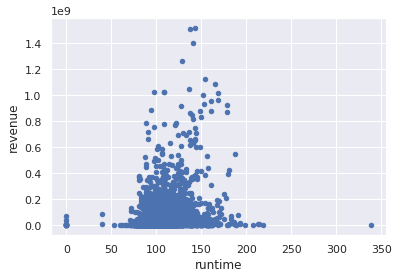

In [26]:
train_df.plot(x="runtime", y="revenue", kind="scatter")

It seems that in the range of 50-200 minutes, there's an high revenue.

## Random Forest
Now that we have all features in a numerical format, we can fit our models. We start by fitting a Random Forest: we are going to use Grid Search CV from sklearn to find the best number of trees. The metrics we are going to use is the "OOB score", which allows us to avoid explicit cross-validation.
We are going to make a test set that will be used at the end to test our model.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rf_params = {
    "bootstrap": [True],
    "n_estimators": [10, 100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, verbose=0)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'bootstrap': True, 'n_estimators': 300}


So, we see that 1000 is the best number of estimators for our model. Let's then fit one with such number of estimators.

In [28]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=1000, oob_score=True, bootstrap=True)

rf.fit(X_train, y_train)

print(rf.oob_score_)

0.6285223573837951


OOB score shows us that the model performs poorly. Let's see with xgboost, without any particular tuning.

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

xgb_reg = xgb.XGBRegressor(n_jobs=-1)

xgb_reg.fit(X_train, y_train)

preds = xgb_reg.predict(X_test)
print(preds < 0)

print(np.sqrt(mean_squared_log_error(y_test, preds)))

[05:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False Fal

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.